In [ ]:

import zipfile
import pandas as pd

# Assuming lungcancer.zip is in /content/
zip_file_path = "/content/lungcancer.zip"

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Assuming there's only one CSV file inside the zip
        csv_file_name = zip_ref.namelist()[0]
        with zip_ref.open(csv_file_name) as csv_file:
            df = pd.read_csv(csv_file)
            print(df.info())
            # Perform other operations with the dataframe 'df'

except FileNotFoundError:
    print(f"Error: File not found at {zip_file_path}")
except zipfile.BadZipFile:
    print(f"Error: Invalid zip file at {zip_file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Patient_ID                 300000 non-null  int64  
 1   Age                        300000 non-null  int64  
 2   Gender                     300000 non-null  object 
 3   Smoking_History            300000 non-null  object 
 4   Years_Smoked               300000 non-null  int64  
 5   Pack_Years                 300000 non-null  int64  
 6   Family_History_Cancer      300000 non-null  bool   
 7   Occupation                 300000 non-null  object 
 8   Exposure_to_Toxins         300000 non-null  bool   
 9   Residential_Area           300000 non-null  object 
 10  BMI                        300000 non-null  float64
 11  Lung_Function_Test_Result  300000 non-null  float64
 12  Chest_Pain_Symptoms        300000 non-null  bool   
 13  Shortness_of_Breath        30

In [ ]:
df.describe()

Patient_ID            Age   Years_Smoked    Pack_Years  \
count  300000.000000  300000.000000  300000.000000  300000.00000   
mean   150000.500000      53.450403      24.506443      39.52850   
std     86602.684716      20.781058      14.432958      23.08892   
min         1.000000      18.000000       0.000000       0.00000   
25%     75000.750000      35.000000      12.000000      20.00000   
50%    150000.500000      53.000000      25.000000      40.00000   
75%    225000.250000      71.000000      37.000000      59.00000   
max    300000.000000      89.000000      49.000000      79.00000   

                 BMI  Lung_Function_Test_Result  Air_Quality_Index  \
count  300000.000000              300000.000000      300000.000000   
mean       28.008541                  64.954334         254.393990   
std         6.931694                  20.196922         141.498432   
min        16.000000                  30.000000          10.000000   
25%        22.000000                  47.500000         132.000000   
50%        28.000000                  64.900000         254.000000   
75%        34.000000                  82.500000         377.000000   
max        40.000000                 100.000000         499.000000   

       Tumor_Size_cm  Survival_Years  Follow_Up_Visits  Year_of_Diagnosis  
count  300000.000000   300000.000000     300000.000000      300000.000000  
mean        7.491391        9.502227         24.488040        2011.998030  
std         4.323123        5.762411         14.434192           7.214658  
min         0.000000        0.000000          0.000000        2000.000000  
25%         3.750000        5.000000         12.000000        2006.000000  
50%         7.490000       10.000000         24.000000        2012.000000  
75%        11.230000       14.000000         37.000000        2018.000000  
max        15.000000       19.000000         49.000000        2024.000000

In [ ]:
df.head()

Patient_ID  Age  Gender Smoking_History  Years_Smoked  Pack_Years  \
0           1   69    Male           Never            30           3   
1           2   32  Female          Former             6          61   
2           3   89    Male           Never             2           9   
3           4   78  Female           Never            11          69   
4           5   38    Male          Former            11          57   

   Family_History_Cancer      Occupation  Exposure_to_Toxins Residential_Area  \
0                  False          Farmer               False            Urban   
1                  False   Office Worker               False            Urban   
2                   True   Office Worker                True            Rural   
3                  False  Factory Worker                True            Urban   
4                  False          Farmer               False            Rural   

   ...  Previous_Cancer_Diagnosis  Tumor_Size_cm  Metastasis_Status  \
0  ...                       True          11.02               True   
1  ...                      False          14.29               True   
2  ...                      False           9.47              False   
3  ...                      False           2.22              False   
4  ...                      False           8.26              False   

   Stage_of_Cancer  Treatment_Type  Survival_Years Follow_Up_Visits  \
0              III         Surgery              12               24   
1               II    Chemotherapy               6               12   
2              III    Chemotherapy               6               15   
3               IV    Chemotherapy              13               25   
4              III      Palliative               3                4   

  Medication_Response  Symptom_Progression Year_of_Diagnosis  
0                Good               Stable              2007  
1                Poor               Stable              2009  
2                Good            Worsening              2015  
3            Moderate            Improving              2012  
4                Good               Stable              2014  

[5 rows x 30 columns]

In [ ]:
df.shape

(300000, 30)

In [ ]:
df=df.drop_duplicates()

In [ ]:
#Checking for null values
df.isnull().sum()

Patient_ID                       0
Age                              0
Gender                           0
Smoking_History                  0
Years_Smoked                     0
Pack_Years                       0
Family_History_Cancer            0
Occupation                       0
Exposure_to_Toxins               0
Residential_Area                 0
BMI                              0
Lung_Function_Test_Result        0
Chest_Pain_Symptoms              0
Shortness_of_Breath              0
Chronic_Cough                    0
Weight_Loss                      0
Physical_Activity_Level          0
Dietary_Habits                   0
Air_Quality_Index                0
Comorbidities                90376
Previous_Cancer_Diagnosis        0
Tumor_Size_cm                    0
Metastasis_Status                0
Stage_of_Cancer                  0
Treatment_Type                   0
Survival_Years                   0
Follow_Up_Visits                 0
Medication_Response              0
Symptom_Progression              0
Year_of_Diagnosis                0
dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import skew, kurtosis

In [ ]:
# 1. Vector and Matrix Calculations
numeric_cols = df.select_dtypes(include=[np.number]).columns
vector = df[numeric_cols[1]].values  # Example: Age column
matrix = df[numeric_cols[:5]].values  # Example: First 5 numeric columns
matrix_transpose = matrix.T
matrix_dot_product = np.dot(matrix_transpose, matrix)

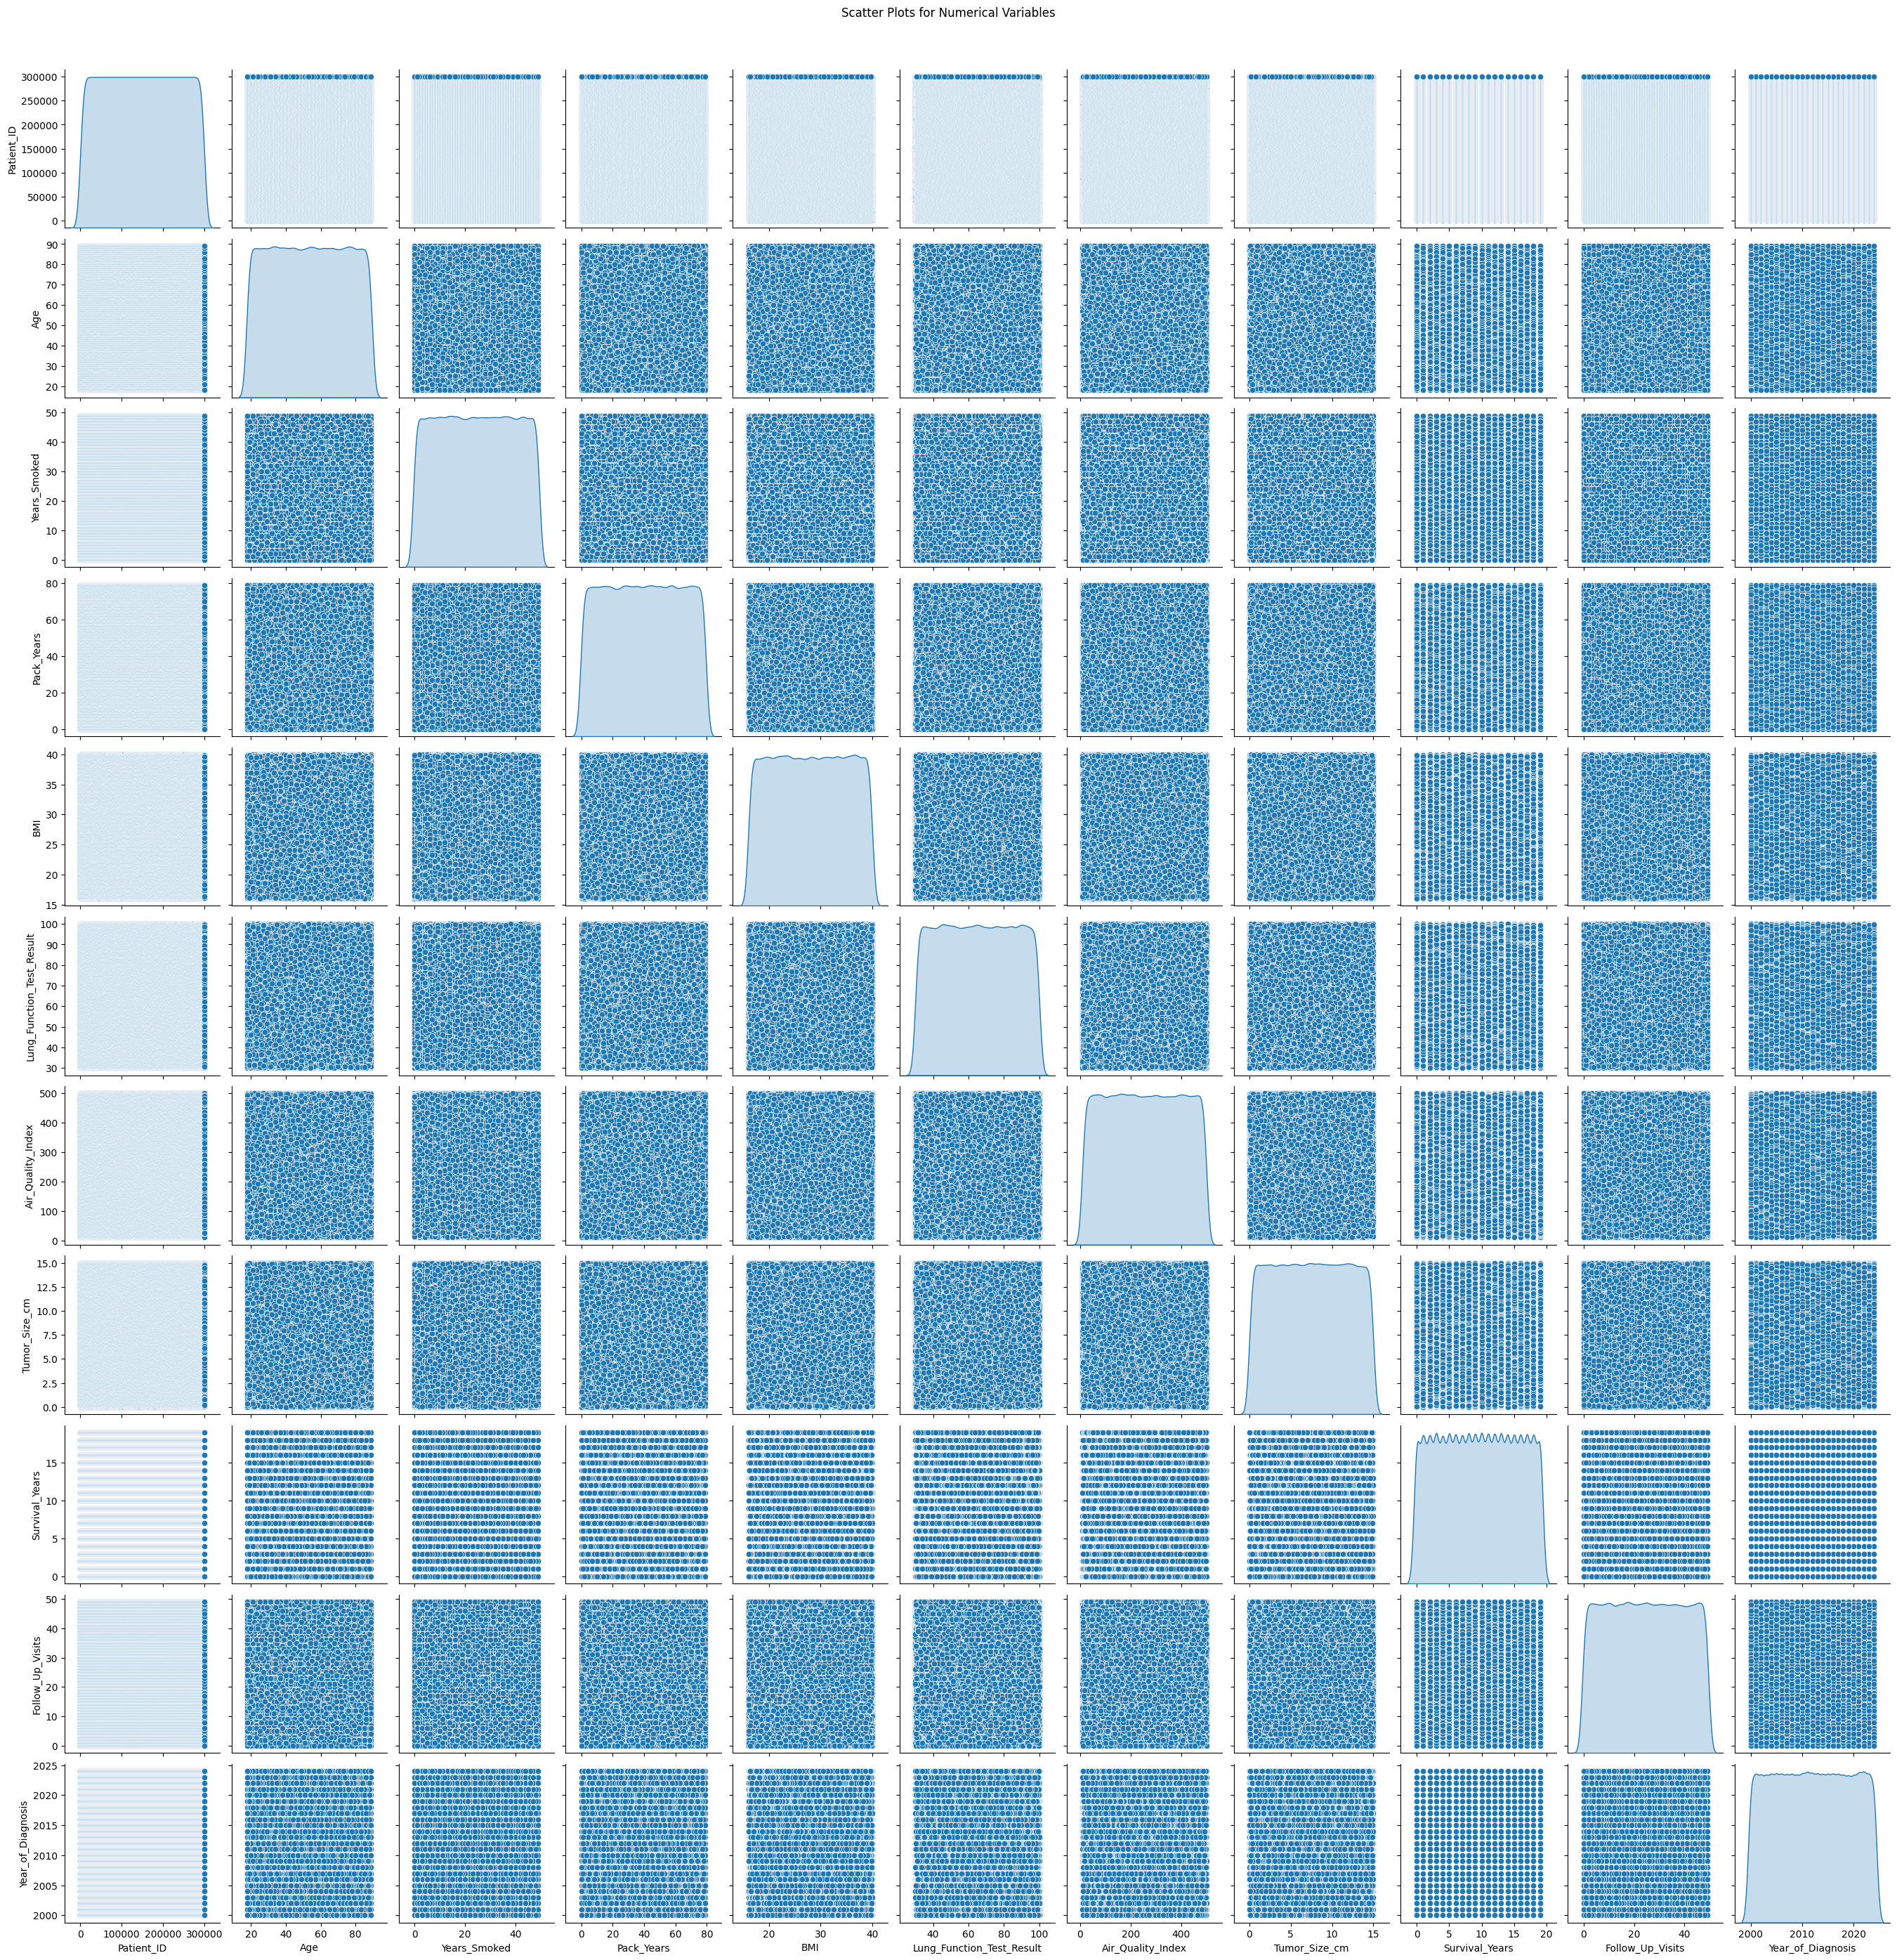

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Replace 'data.csv' with the actual file name)
df = pd.read_csv('/content/lungcancer.zip')

# Convert column names to a valid format (replace spaces with underscores, if necessary)
df.columns = df.columns.str.replace(' ', '_')

# Selecting numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Scatter plots for each pair of numerical variables
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.suptitle('Scatter Plots for Numerical Variables', y=1.02)
plt.show()


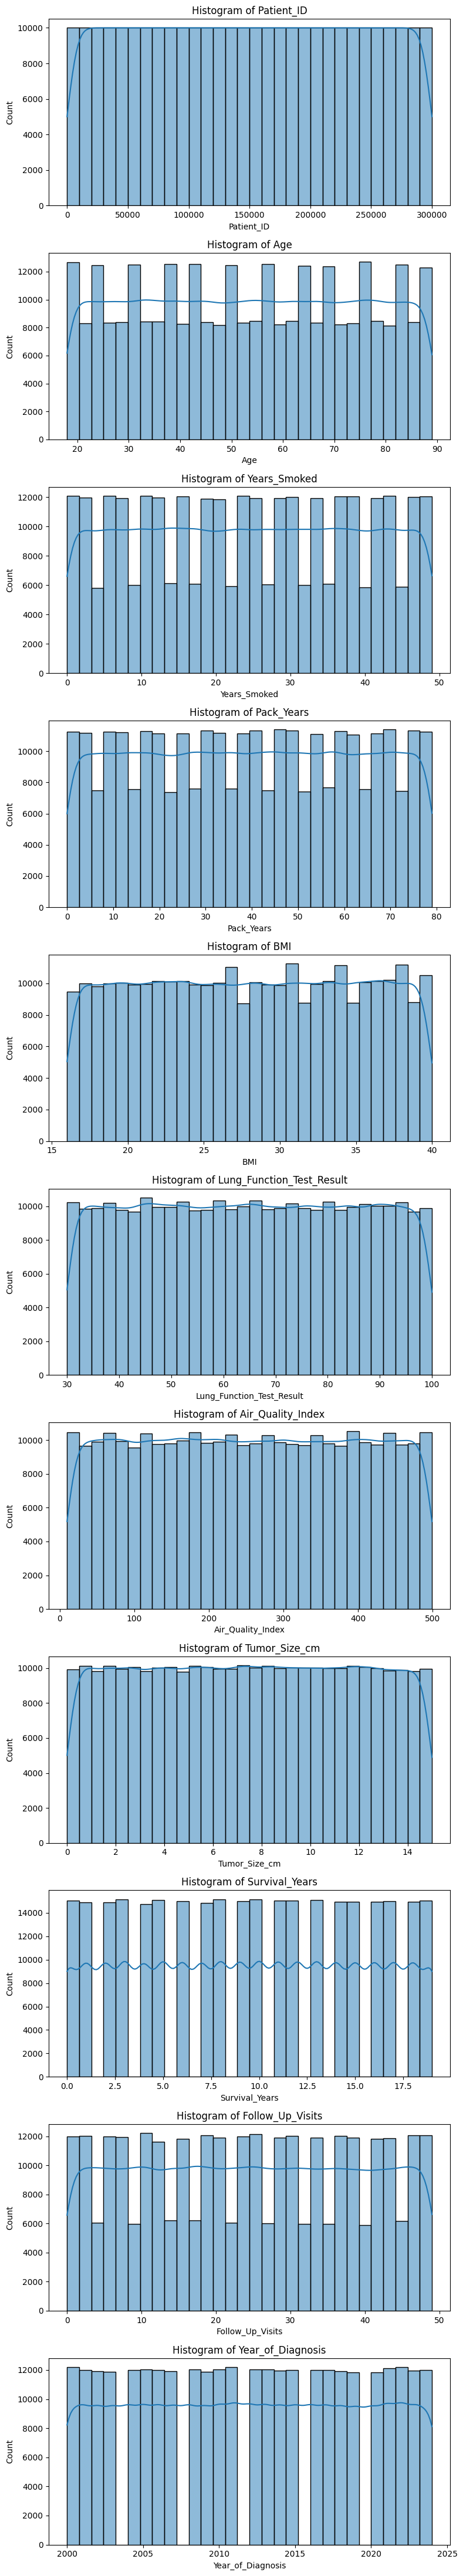

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Replace 'data.csv' with the actual file name)
df = pd.read_csv('/content/lungcancer.zip')

# Convert column names to a valid format (replace spaces with underscores, if necessary)
df.columns = df.columns.str.replace(' ', '_')

# Selecting numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Histograms for each numerical column
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(8, len(numerical_cols) * 4))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


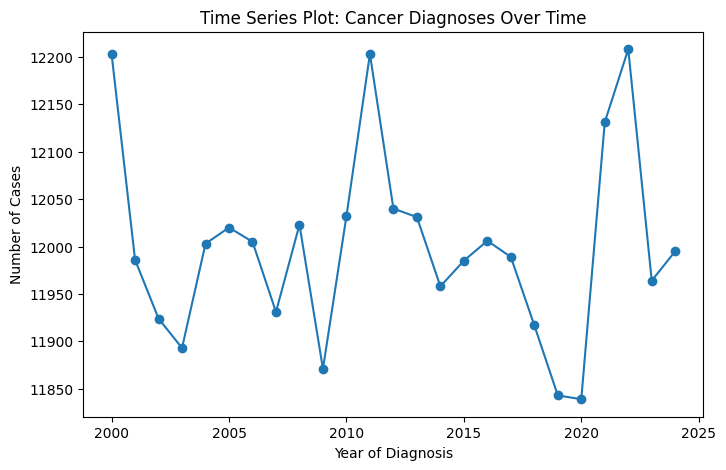

In [ ]:
# 4. Time Series Plot (Example: Year of Diagnosis vs Number of Cases)
df["Year_of_Diagnosis"].value_counts().sort_index().plot(kind='line', marker='o', figsize=(8, 5))
plt.xlabel("Year of Diagnosis")
plt.ylabel("Number of Cases")
plt.title("Time Series Plot: Cancer Diagnoses Over Time")
plt.show()

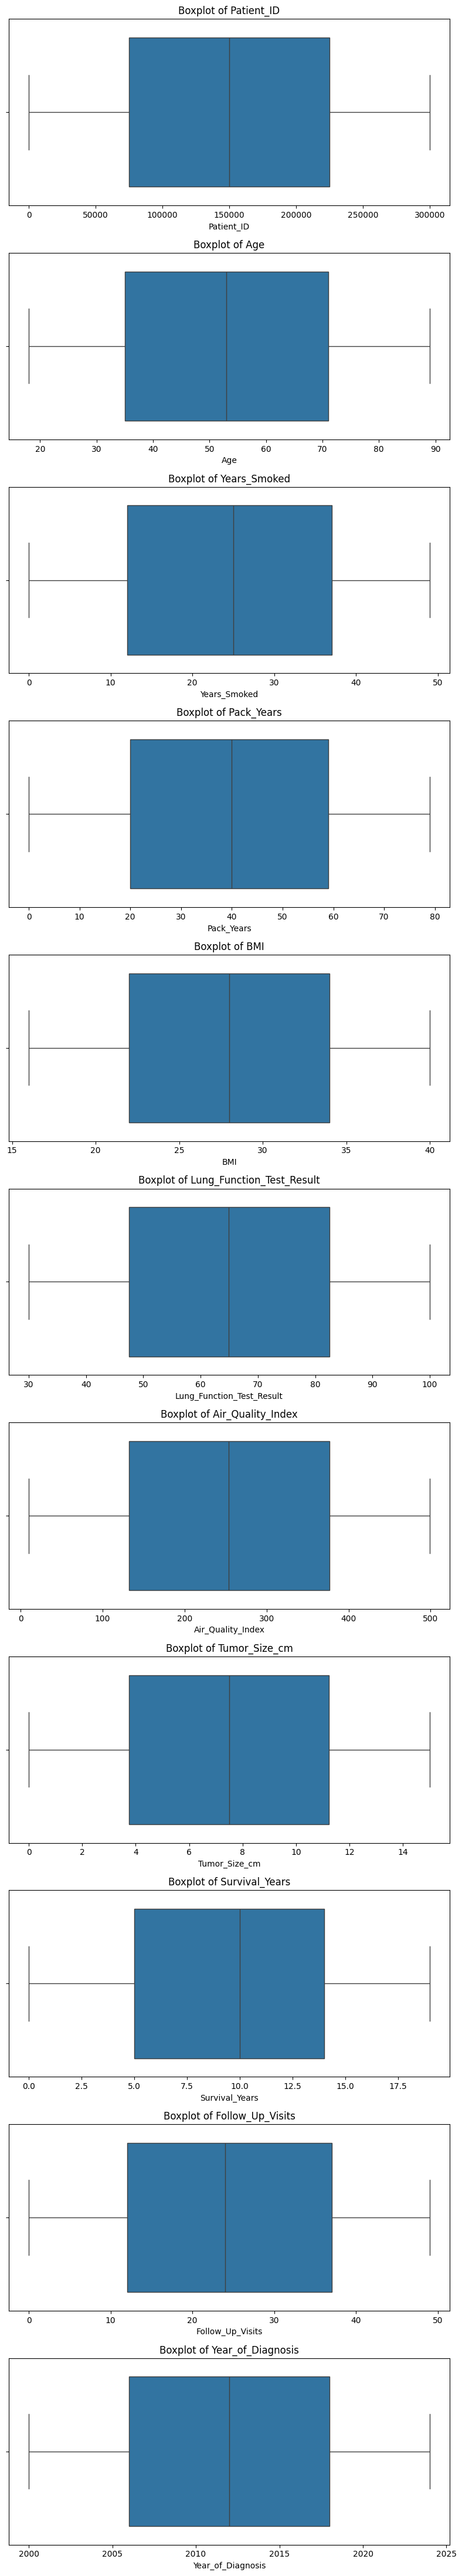

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Replace 'data.csv' with the actual file name)
df = pd.read_csv('/content/lungcancer.zip')

# Convert column names to a valid format (replace spaces with underscores, if necessary)
df.columns = df.columns.str.replace(' ', '_')

# Selecting numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Boxplots for each numerical column
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(8, len(numerical_cols) * 4))
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
# 7. Outlier Detection (Using IQR Method)
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outliers per feature:\n", outliers)


Outliers per feature:
 Patient_ID                   0
Age                          0
Years_Smoked                 0
Pack_Years                   0
BMI                          0
Lung_Function_Test_Result    0
Air_Quality_Index            0
Tumor_Size_cm                0
Survival_Years               0
Follow_Up_Visits             0
Year_of_Diagnosis            0
dtype: int64


In [ ]:
# 9. Skewness and Kurtosis Calculation
skewness = df[numeric_cols].apply(skew)
kurtosis_values = df[numeric_cols].apply(kurtosis)
print("Skewness:\n", skewness)
print("Kurtosis:\n", kurtosis_values)


Skewness:
 Patient_ID                   0.000000
Age                          0.001881
Years_Smoked                 0.000237
Pack_Years                  -0.001304
BMI                         -0.001999
Lung_Function_Test_Result    0.001009
Air_Quality_Index            0.002255
Tumor_Size_cm               -0.000484
Survival_Years              -0.000791
Follow_Up_Visits             0.003127
Year_of_Diagnosis            0.000052
dtype: float64
Kurtosis:
 Patient_ID                  -1.200000
Age                         -1.200812
Years_Smoked                -1.200605
Pack_Years                  -1.198920
BMI                         -1.202842
Lung_Function_Test_Result   -1.199730
Air_Quality_Index           -1.200712
Tumor_Size_cm               -1.196736
Survival_Years              -1.203003
Follow_Up_Visits            -1.199679
Year_of_Diagnosis           -1.202796
dtype: float64


Root Mean Squared Error (RMSE): 4.3149
R² Score: -0.0001


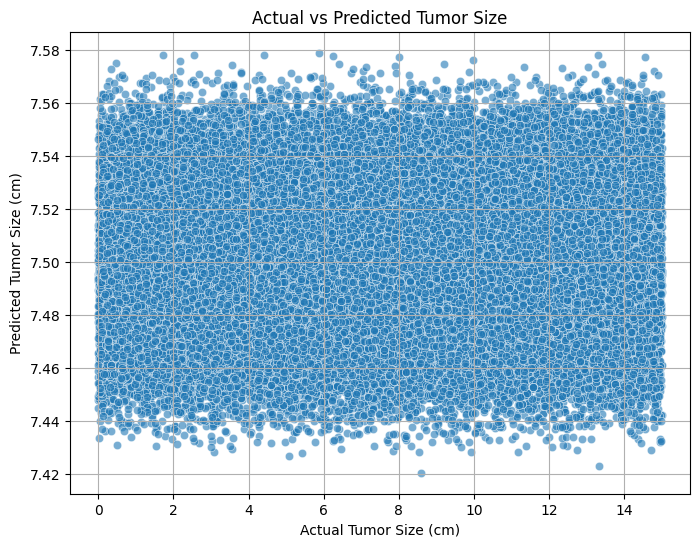

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = "/content/lung_cancer_data.csv"
df = pd.read_csv(file_path)

# Select numerical features for regression
features = ["Age", "Years_Smoked", "Pack_Years", "BMI", "Lung_Function_Test_Result", "Air_Quality_Index"]
target = "Tumor_Size_cm"  # Predicting tumor size

# Drop missing values
df = df[features + [target]].dropna()

# Define input (X) and output (y)
X = df[features]
y = df[target]

# Scale the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Tumor Size (cm)")
plt.ylabel("Predicted Tumor Size (cm)")
plt.title("Actual vs Predicted Tumor Size")
plt.grid(True)
plt.show()


<ipython-input-16-ef9791fc23b8>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = scaler.fit_transform(X[numerical_features])



Logistic Regression Accuracy: 0.6717
Classification Report:
               precision    recall  f1-score   support

       Large       0.67      1.00      0.80     28159
      Medium       0.00      0.00      0.00      8228
       Small       0.00      0.00      0.00      5538

    accuracy                           0.67     41925
   macro avg       0.22      0.33      0.27     41925
weighted avg       0.45      0.67      0.54     41925



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


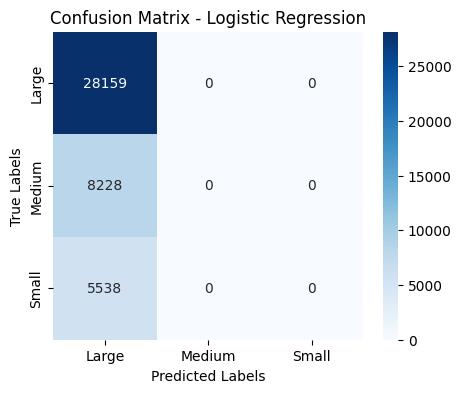


Random Forest Accuracy: 0.6717
Classification Report:
               precision    recall  f1-score   support

       Large       0.67      1.00      0.80     28159
      Medium       0.43      0.00      0.00      8228
       Small       0.00      0.00      0.00      5538

    accuracy                           0.67     41925
   macro avg       0.37      0.33      0.27     41925
weighted avg       0.54      0.67      0.54     41925



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


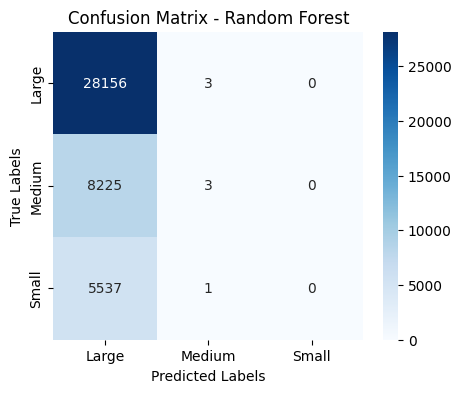


K-Nearest Neighbors Accuracy: 0.6246
Classification Report:
               precision    recall  f1-score   support

       Large       0.67      0.91      0.77     28159
      Medium       0.18      0.07      0.10      8228
       Small       0.12      0.02      0.03      5538

    accuracy                           0.62     41925
   macro avg       0.32      0.33      0.30     41925
weighted avg       0.50      0.62      0.54     41925



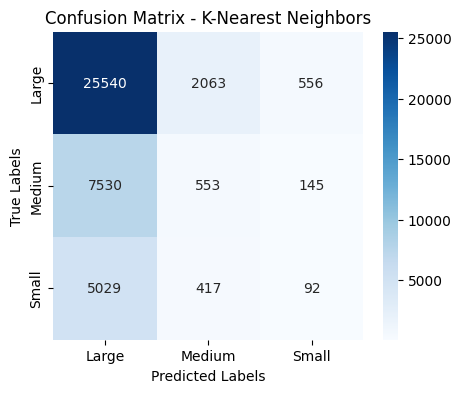


Gradient Boosting Accuracy: 0.6717
Classification Report:
               precision    recall  f1-score   support

       Large       0.67      1.00      0.80     28159
      Medium       1.00      0.00      0.00      8228
       Small       0.00      0.00      0.00      5538

    accuracy                           0.67     41925
   macro avg       0.56      0.33      0.27     41925
weighted avg       0.65      0.67      0.54     41925



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


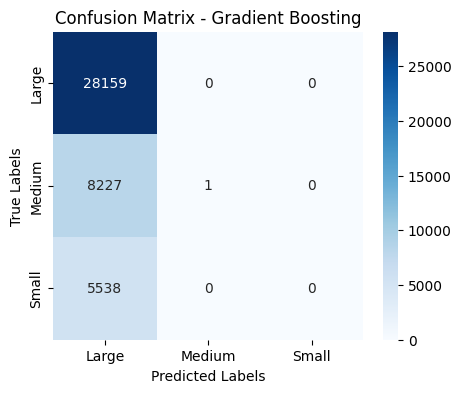

<ipython-input-16-ef9791fc23b8>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


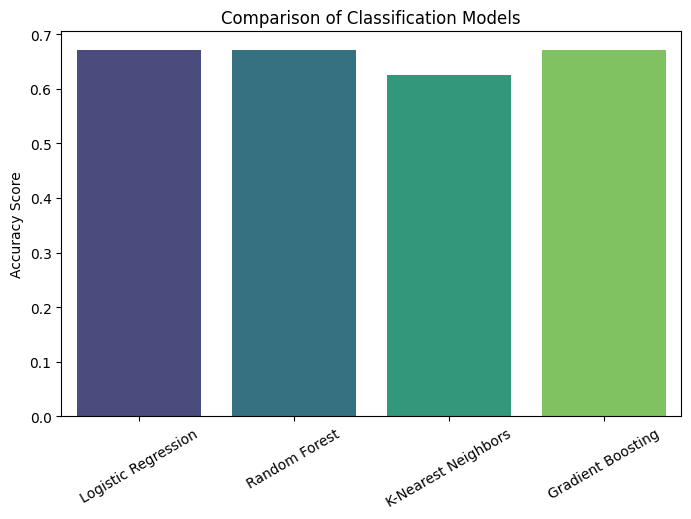

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
file_path = "/content/lung_cancer_data.csv"
df = pd.read_csv(file_path)

# Select numerical and categorical features
numerical_features = [
    "Age", "Years_Smoked", "Pack_Years", "BMI", "Lung_Function_Test_Result", "Air_Quality_Index"
]
categorical_features = [
    "Gender", "Smoking_History", "Family_History_Cancer", "Occupation",
    "Exposure_to_Toxins", "Residential_Area", "Comorbidities",
    "Previous_Cancer_Diagnosis", "Metastasis_Status"
]
target = "Tumor_Size_cm"  # Original target (numerical)

# Drop missing values
df = df[numerical_features + categorical_features + [target]].dropna()

# Categorize tumor size into classes
def categorize_tumor_size(size):
    if size <= 2:
        return "Small"
    elif 2 < size <= 5:
        return "Medium"
    else:
        return "Large"

df["Tumor_Category"] = df["Tumor_Size_cm"].apply(categorize_tumor_size)

# Encode categorical target (Small=0, Medium=1, Large=2)
label_encoder = LabelEncoder()
df["Tumor_Category"] = label_encoder.fit_transform(df["Tumor_Category"])

# Encode other categorical variables
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Define input (X) and output (y)
X = df[numerical_features + categorical_features]
y = df["Tumor_Category"]  # Categorical classification target

# Scale numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

    # Print results
    print(f"\n{model_name} Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Compute and display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot model accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Classification Models")
plt.xticks(rotation=30)
plt.show()


<ipython-input-17-2136f772bfbf>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = scaler.fit_transform(X[numerical_features])


Logistic Regression Accuracy: 0.6717
Classification Report:
               precision    recall  f1-score   support

       Large       0.67      1.00      0.80     28159
      Medium       0.00      0.00      0.00      8228
       Small       0.00      0.00      0.00      5538

    accuracy                           0.67     41925
   macro avg       0.22      0.33      0.27     41925
weighted avg       0.45      0.67      0.54     41925

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.6717
Classification Report:
               precision    recall  f1-score   support

       Large       0.67      1.00      0.80     28159
      Medium       0.43      0.00      0.00      8228
       Small       0.00      0.00      0.00      5538

    accuracy                           0.67     41925
   macro avg       0.37      0.33      0.27     41925
weighted avg       0.54      0.67      0.54     41925

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


K-Nearest Neighbors Accuracy: 0.6246
Classification Report:
               precision    recall  f1-score   support

       Large       0.67      0.91      0.77     28159
      Medium       0.18      0.07      0.10      8228
       Small       0.12      0.02      0.03      5538

    accuracy                           0.62     41925
   macro avg       0.32      0.33      0.30     41925
weighted avg       0.50      0.62      0.54     41925

--------------------------------------------------
Gradient Boosting Accuracy: 0.6717
Classification Report:
               precision    recall  f1-score   support

       Large       0.67      1.00      0.80     28159
      Medium       1.00      0.00      0.00      8228
       Small       0.00      0.00      0.00      5538

    accuracy                           0.67     41925
   macro avg       0.56      0.33      0.27     41925
weighted avg       0.65      0.67      0.54     41925

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-17-2136f772bfbf>:82: FutureWarning

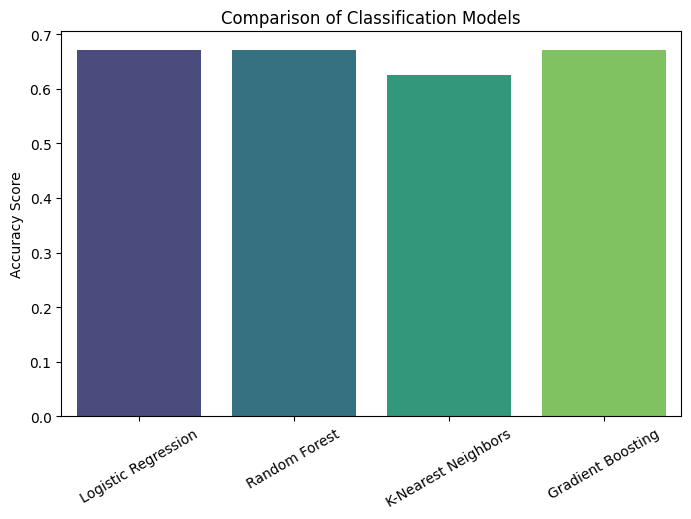

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
file_path = "/content/lung_cancer_data.csv"
df = pd.read_csv(file_path)

# Select numerical and categorical features
numerical_features = [
    "Age", "Years_Smoked", "Pack_Years", "BMI", "Lung_Function_Test_Result", "Air_Quality_Index"
]
categorical_features = [
    "Gender", "Smoking_History", "Family_History_Cancer", "Occupation",
    "Exposure_to_Toxins", "Residential_Area", "Comorbidities",
    "Previous_Cancer_Diagnosis", "Metastasis_Status"
]
target = "Tumor_Size_cm"  # Original target (numerical)

# Drop missing values
df = df[numerical_features + categorical_features + [target]].dropna()

# Categorize tumor size into classes
def categorize_tumor_size(size):
    if size <= 2:
        return "Small"
    elif 2 < size <= 5:
        return "Medium"
    else:
        return "Large"

df["Tumor_Category"] = df["Tumor_Size_cm"].apply(categorize_tumor_size)

# Encode categorical target (Small=0, Medium=1, Large=2)
label_encoder = LabelEncoder()
df["Tumor_Category"] = label_encoder.fit_transform(df["Tumor_Category"])

# Encode other categorical variables
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Define input (X) and output (y)
X = df[numerical_features + categorical_features]
y = df["Tumor_Category"]  # Categorical classification target

# Scale numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("-" * 50)

# Plot model accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Classification Models")
plt.xticks(rotation=30)
plt.show()


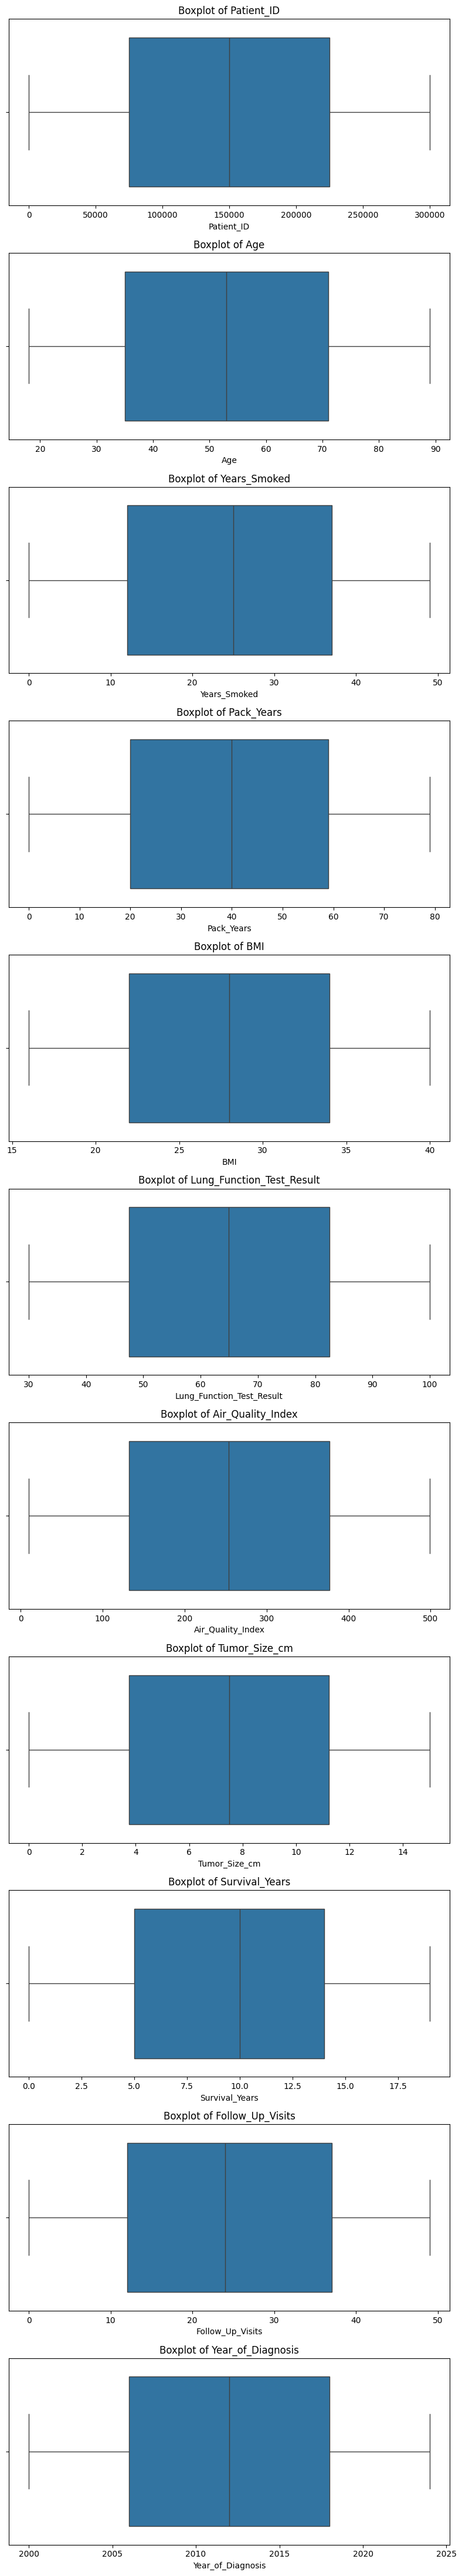

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder

df = pd.read_csv('/content/lungcancer.zip')

df.columns = df.columns.str.replace(' ', '_')

# Selecting numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

n_bins = 3  # Number of bins to create
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
# Handling class imbalance using SMOTE after discretization
X = df.drop(columns=['Tumor_Size_cm'])  # Tumor size is the target variable
y = df['Tumor_Size_cm'].values.reshape(-1, 1) # Reshape y to a 2D array

y_discretized = discretizer.fit_transform(y) # Discretize the target variable
# Now you can apply SMOTE to the discretized target
from imblearn.over_sampling import SMOTE

# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns

# Create OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output

# Fit and transform the categorical features
encoded_data = encoder.fit_transform(X[categorical_features])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical features and concatenate encoded features
X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)
# --- End of changes ---

X_resampled, y_resampled = SMOTE().fit_resample(X, y_discretized.ravel())


# Boxplots for each numerical column
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(8, len(numerical_cols) * 4))
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

<ipython-input-19-744e2f2ae048>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = scaler.fit_transform(X[numerical_features])


KNN Accuracy: 0.6246
Classification Report:
               precision    recall  f1-score   support

       Large       0.67      0.91      0.77     28159
      Medium       0.18      0.07      0.10      8228
       Small       0.12      0.02      0.03      5538

    accuracy                           0.62     41925
   macro avg       0.32      0.33      0.30     41925
weighted avg       0.50      0.62      0.54     41925



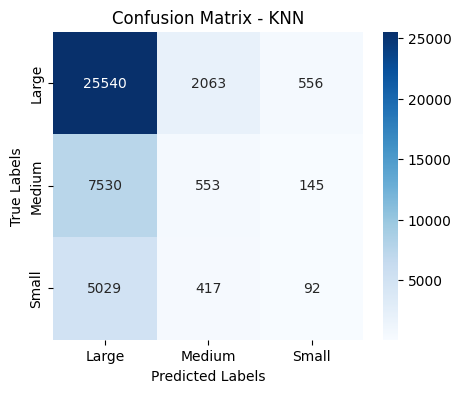

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
v
file_path = "/content/lungcancer.zip"

try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Preprocessing (same as your previous code)
numerical_features = [
    "Age", "Years_Smoked", "Pack_Years", "BMI", "Lung_Function_Test_Result", "Air_Quality_Index"
]
categorical_features = [
    "Gender", "Smoking_History", "Family_History_Cancer", "Occupation",
    "Exposure_to_Toxins", "Residential_Area", "Comorbidities",
    "Previous_Cancer_Diagnosis", "Metastasis_Status"
]
target = "Tumor_Size_cm"

df = df[numerical_features + categorical_features + [target]].dropna()

def categorize_tumor_size(size):
    if size <= 2:
        return "Small"
    elif 2 < size <= 5:
        return "Medium"
    else:
        return "Large"

df["Tumor_Category"] = df["Tumor_Size_cm"].apply(categorize_tumor_size)
label_encoder = LabelEncoder()
df["Tumor_Category"] = label_encoder.fit_transform(df["Tumor_Category"])

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df[numerical_features + categorical_features]
y = df["Tumor_Category"]

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate KNN
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Confusion Matrix - KNN")
plt.show()


Logistic Regression Accuracy: 0.6716517590936195

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80     28159
           1       0.00      0.00      0.00      8228
           2       0.00      0.00      0.00      5538

    accuracy                           0.67     41925
   macro avg       0.22      0.33      0.27     41925
weighted avg       0.45      0.67      0.54     41925



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


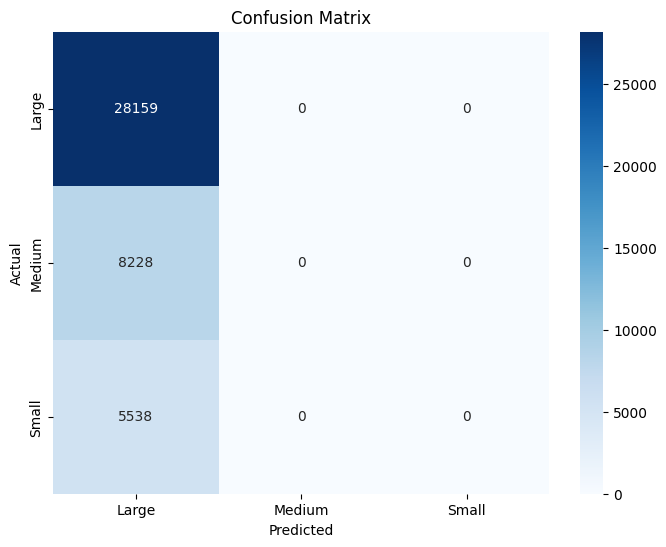

In [ ]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=500) # Increased max_iter
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.6716517590936195

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80     28159
           1       0.43      0.00      0.00      8228
           2       0.00      0.00      0.00      5538

    accuracy                           0.67     41925
   macro avg       0.37      0.33      0.27     41925
weighted avg       0.54      0.67      0.54     41925



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


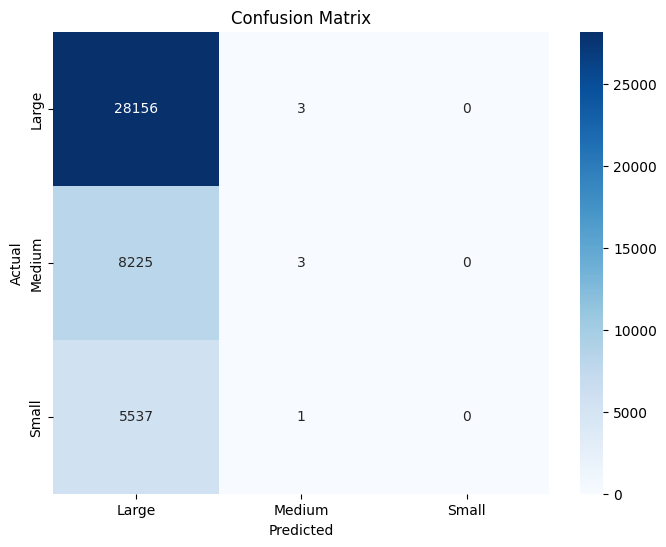

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)  # You can customize parameters here
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


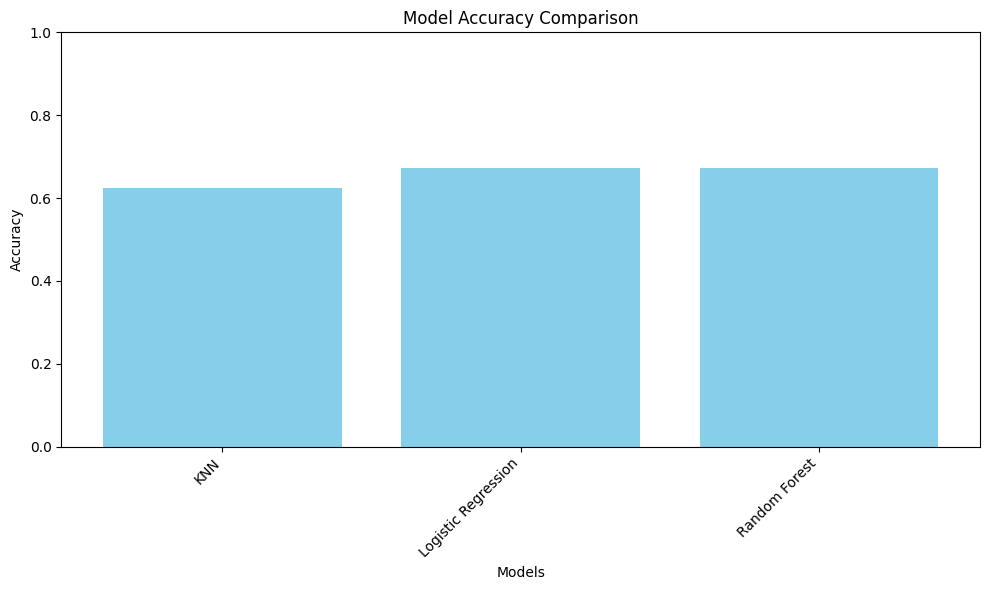

In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary to store your model accuracies
model_accuracies = {
    "KNN": 0.6246,
    "Logistic Regression": 0.6717,
    "Random Forest": 0.6717,

}

plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

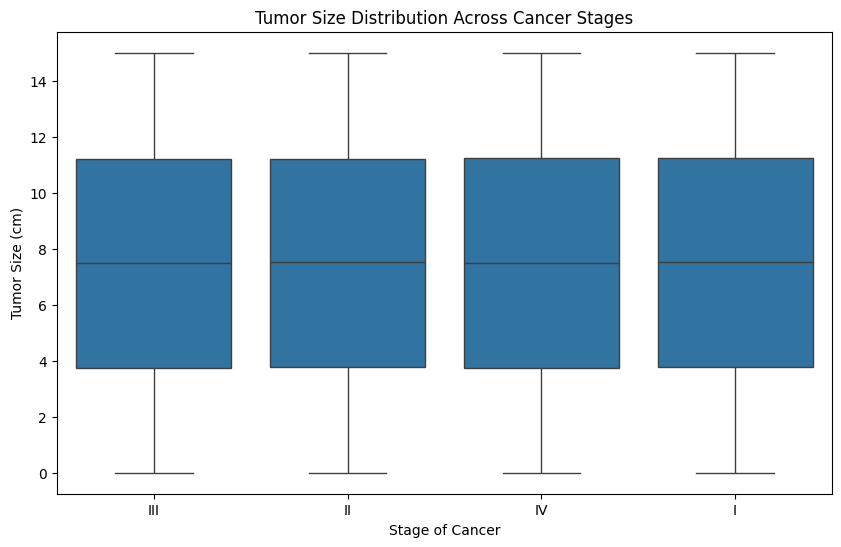

In [ ]:
#create boxplot for all stage of lung cancer Stage_of_Cancer

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('/content/lungcancer.zip')
except FileNotFoundError:
    print("Error: 'lungcancer.zip' not found. Please upload the file to the Colab environment.")
    exit()

# Convert column names to a valid format
df.columns = df.columns.str.replace(' ', '_')

if 'Stage_of_Cancer' not in df.columns:
    print("Error: 'Stage_of_Cancer' column not found in the dataset.")
    exit()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Stage_of_Cancer', y='Tumor_Size_cm', data=df)  # Assuming 'Tumor_Size_cm' is the relevant numerical feature
plt.xlabel('Stage of Cancer')
plt.ylabel('Tumor Size (cm)')
plt.title('Tumor Size Distribution Across Cancer Stages')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "/content/lungcancer.zip"
df = pd.read_csv(file_path)


# Selecting relevant features and target variable
numerical_features = [
    "Age", "Years_Smoked", "Pack_Years", "BMI", "Lung_Function_Test_Result", "Air_Quality_Index"
]
categorical_features = [
    "Gender", "Smoking_History", "Family_History_Cancer", "Occupation",
    "Exposure_to_Toxins", "Residential_Area", "Comorbidities",
    "Previous_Cancer_Diagnosis", "Metastasis_Status"
]
target = "Tumor_Size_cm"

# Convert categorical features to numerical using Label Encoding
for feature in categorical_features:
    if df[feature].dtype == 'object':
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])

# Convert tumor size into binary classification (0: Small, 1: Large)
threshold = df[target].median()  # Use median as threshold
df[target] = (df[target] >= threshold).astype(int)

# Dropping NaN values
df_clean = df[numerical_features + categorical_features + [target]].dropna()

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(
    df_clean.drop(columns=[target]), df_clean[target], test_size=0.2, random_state=42
)

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "kNN": KNeighborsClassifier()
}

# Store results
results = {}
summary = {}

for model_name, model in models.items():
    print(f"\n{'='*30}\nModel: {model_name}\n{'='*30}")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Compute residuals (errors)
    residuals = y_test - y_pred

    # Mean and std deviation of residuals
    mean_residual = np.mean(residuals)
    std_residual = np.std(residuals, ddof=1)

    # T-test for residuals
    t_stat, t_p_value = stats.ttest_1samp(residuals, 0)

    # Store results
    results[model_name] = {
        "mean_residual": mean_residual,
        "std_residual": std_residual,
        "t_test": (t_stat, t_p_value),
        "residuals": residuals
    }

    # Print individual results
    print(f"Mean Residual: {mean_residual}")
    print(f"Standard Deviation of Residuals: {std_residual}")
    print(f"T-Test Statistic: {t_stat}, P-Value: {t_p_value}")

# ANOVA Test: Comparing means of residuals across models
anova_f, anova_p = stats.f_oneway(
    results["Logistic Regression"]["residuals"],
    results["Random Forest"]["residuals"],
    results["kNN"]["residuals"]
)
summary["ANOVA"] = {"F-Statistic": anova_f, "P-Value": anova_p}

# Type I & Type II Errors
type1_error = {model: 1 - results[model]["t_test"][1] for model in results}
type2_error = {model: results[model]["t_test"][1] for model in results}
summary["Type I Error"] = type1_error
summary["Type II Error"] = type2_error

# Determine the best model based on lowest mean residual
best_model = min(results, key=lambda k: abs(results[k]["mean_residual"]))
summary["Best Model"] = best_model

# Print Summary
print(f"\n{'='*30}\nSummary\n{'='*30}")
print("ANOVA F-Statistic:", anova_f)
print("ANOVA P-Value:", anova_p)
print("Type I Error (False Positive Rate):", type1_error)
print("Type II Error (False Negative Rate):", type2_error)
print(f"Best Model Based on Mean Residual: {best_model}")


Model: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean Residual: -0.14773333333333333
Standard Deviation of Residuals: 0.6932889294617566
T-Test Statistic: -52.196316613333224, P-Value: 0.0

Model: Random Forest
Mean Residual: 0.024
Standard Deviation of Residuals: 0.7066580899515763
T-Test Statistic: 8.319122735976817, P-Value: 9.045348269348746e-17

Model: kNN
Mean Residual: -0.0024833333333333335
Standard Deviation of Residuals: 0.7053028597168208
T-Test Statistic: -0.8624521287715352, P-Value: 0.38844221233441956

Summary
ANOVA F-Statistic: 1041.4700860826001
ANOVA P-Value: 0.0
Type I Error (False Positive Rate): {'Logistic Regression': np.float64(1.0), 'Random Forest': np.float64(0.9999999999999999), 'kNN': np.float64(0.6115577876655804)}
Type II Error (False Negative Rate): {'Logistic Regression': np.float64(0.0), 'Random Forest': np.float64(9.045348269348746e-17), 'kNN': np.float64(0.38844221233441956)}
Best Model Based on Mean Residual: kNN
